In [2]:
import numpy as np
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
print( 'Target classes:', iris.target_names )

Target classes: ['setosa' 'versicolor' 'virginica']


In [5]:
print( 'Truncated data array:', iris.data[ :5 ], '\n---\n', iris.data[ -5: ] )

Truncated data array: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 
---
 [[6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]


In [6]:
print( 'Target labels:', iris.target )

Target labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
X = iris.data[ :, [ 2, 3 ] ]
y = iris.target

/var/folders/bz/s6xqq28j0rv380_q277km9l40000gp/T/ipykernel_10391/2294305728.py:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(\


Text(0.5, 0.98, 'Petal Length vs. Width')

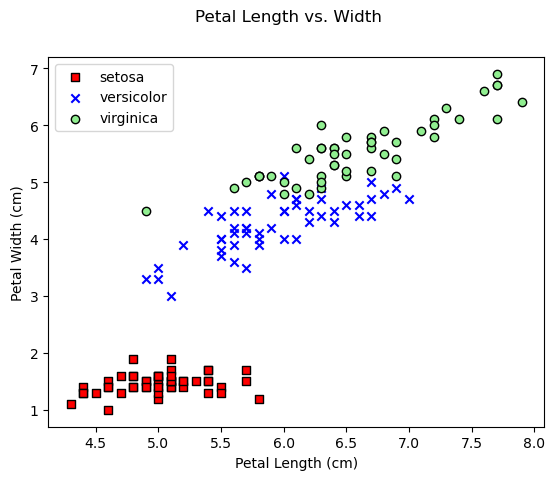

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

markers = ( 's', 'x', 'o' )
colors = ( 'red', 'blue', 'lightgreen' )
cmap = ListedColormap( colors[ :len( np.unique( y ) ) ] )

fig = plt.figure()

for i, col in enumerate( np.unique( y ) ):
    plt.scatter(\
        x=X[ y==col, 0 ], y=X[ y==col, 1 ],\
        c=[cmap( i )], marker=markers[ i ],\
        edgecolor='black', label=col )
    
plt.xlabel( 'Petal Length (cm)' )
plt.ylabel( 'Petal Width (cm)' )
plt.legend( ['setosa', 'versicolor', 'virginica' ] )
fig.suptitle( 'Petal Length vs. Width' )

/var/folders/bz/s6xqq28j0rv380_q277km9l40000gp/T/ipykernel_10391/2252453121.py:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(\


Text(0.5, 0.98, 'Sepal Length vs. Width')

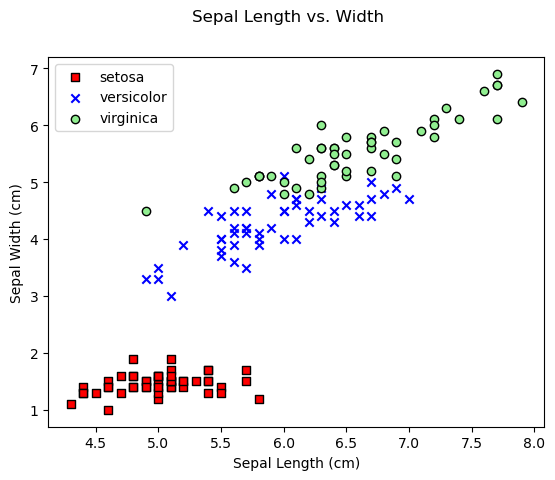

In [10]:
X = iris.data[ :, [ 0, 2 ] ]
y = iris.target

markers = ( 's', 'x', 'o' )
colors = ( 'red', 'blue', 'lightgreen' )
cmap = ListedColormap( colors[ :len( np.unique( y ) ) ] )

fig = plt.figure()

for i, col in enumerate( np.unique( y ) ):
    plt.scatter(\
        x=X[ y==col, 0 ], y=X[ y==col, 1 ],\
        c=[cmap( i )], marker=markers[ i ],\
        edgecolor='black', label=col )
    
plt.xlabel( 'Sepal Length (cm)' )
plt.ylabel( 'Sepal Width (cm)' )
plt.legend( ['setosa', 'versicolor', 'virginica' ] )
fig.suptitle( 'Sepal Length vs. Width' )

In [12]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, stratify=y )

print( 'Number of training samples:', X_train.shape[ 0 ] )
print( 'Number of test samples:', X_test.shape[ 0 ] )

uniq, n = np.unique( y, return_counts = True )
print( 'Frequency of class values in y:', uniq, n )
uniq, n = np.unique( y_train, return_counts = True )
print( 'Frequency of class values in training dataset:', uniq, n )
uniq, n = np.unique( y_test, return_counts = True )
print( 'Frequency of class values in test dataset:', uniq, n )

Number of training samples: 105
Number of test samples: 45
Frequency of class values in y: [0 1 2] [50 50 50]
Frequency of class values in training dataset: [0 1 2] [35 35 35]
Frequency of class values in test dataset: [0 1 2] [15 15 15]


In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit( X_train )

# Transform predictive datasets based on the scalar
X_train_std = sc.transform( X_train )
X_test_std = sc.transform( X_test )

# Join (stack) the data training and test sets into a sequence of rows
X_comb_std = np.vstack( ( X_train_std, X_test_std ) )

# Join (stack) the target training and test sets into a 1D horizontal column
y_comb = np.hstack( ( y_train, y_test ) )

# Print some descriptive statistics about training and target
print( 'Standardized data array:' )
print( X_comb_std[ :5 ], '\n---\n', X_comb_std[ -5: ] )
print( 'Target array:' )
print( y_comb )

Standardized data array:
[[-1.739003   -1.39505895]
 [-0.11537845  0.27539111]
 [ 2.38250548  1.71543427]
 [ 1.00866932  0.50579802]
 [-0.49006104 -1.2798555 ]] 
---
 [[ 0.38419834  0.50579802]
 [-0.98963782 -1.45266068]
 [-0.49006104 -1.16465205]
 [-0.86474363 -1.33745723]
 [-0.49006104  0.44819629]]
Target array:
[0 1 2 1 0 1 0 1 1 2 1 2 0 1 0 1 2 1 2 1 1 1 1 0 2 1 0 2 2 1 1 2 0 2 0 2 0
 0 1 2 2 0 0 2 0 2 1 1 0 2 2 0 0 1 1 1 0 1 0 2 2 2 0 0 2 2 0 0 2 2 1 1 1 0
 1 1 2 0 0 2 2 0 0 0 2 0 1 0 1 1 0 2 2 0 2 2 1 2 1 1 2 2 0 0 1 0 1 1 0 0 2
 1 0 1 2 0 1 1 0 1 2 2 2 1 2 0 2 2 0 0 2 1 1 2 1 1 0 2 2 2 0 2 2 1 0 1 0 0
 0 1]


In [15]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Build a perceptron model based on training data, then classify test data
ppn = Perceptron( max_iter=40, eta0=0.1, random_state=0 )
ppn.fit( X_train_std, y_train )
y_pred = ppn.predict( X_test_std )

# Print results of classification
print( 'Perceptron Model:' )
print( 'Misclassified samples: %d' % ( y_test != y_pred ).sum() )
print( 'Accuracy on training data: {:.2f} (out of 1)'.format( ppn.score( X_train_std, y_train ) ) )
print( 'Accuracy on test data: {:.2f} (out of 1)'.format( ppn.score( X_test_std, y_test ) ) )

Perceptron Model:
Misclassified samples: 14
Accuracy on training data: 0.61 (out of 1)
Accuracy on test data: 0.69 (out of 1)
